<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/10_Customer_Grouping_with_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b50; overflow:hidden"><b>Customer Grouping with K-Means.</b></div>

# *1. Import Libraries*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#

# *2. Import dataset*

In [ ]:

customer_data=pd.read_csv('/Users/maegbug/Downloads/Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data.shape

(200, 5)

#

# *3. Data analysis*

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
X=customer_data.iloc[:,[3,4]].values
X.shape

(200, 2)

#

# *4.Model selection and training*

In [ ]:
# WCSS-within clusters sum of squares
import warnings
warnings.filterwarnings('ignore')

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)



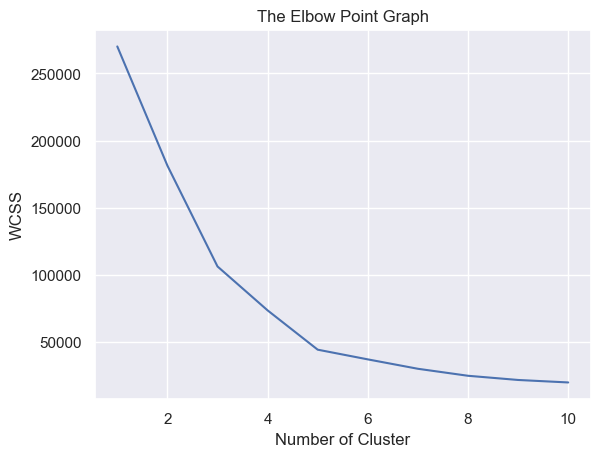

In [ ]:
# visualize

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# optimum number is 5
kmeans_1=KMeans(n_clusters=5,init='k-means++',random_state=42)
Y=kmeans_1.fit_predict(X)
Y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

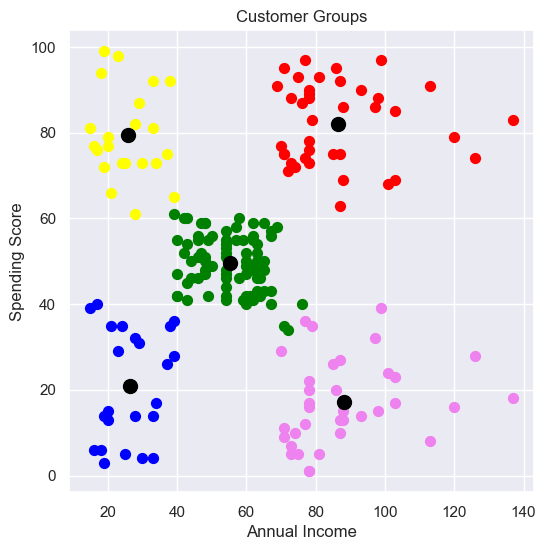

In [ ]:
#Visualize clusters
plt.figure(figsize=(6,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50 ,c='green', label='1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50 ,c='red', label='2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50 ,c='yellow', label='3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50 ,c='violet', label='4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50 ,c='blue', label='5')

# separators
plt.scatter(kmeans_1.cluster_centers_[:,0],kmeans_1.cluster_centers_[:,1], s=100,c='black', label='centroid')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#

# 5. Evaluation Metrics

Inertia: 44448.45544793371
Silhouette Score: 0.553931997444648
Calinski-Harabasz Index: 247.35899338037288
Davies-Bouldin Index: 0.5725628995597086


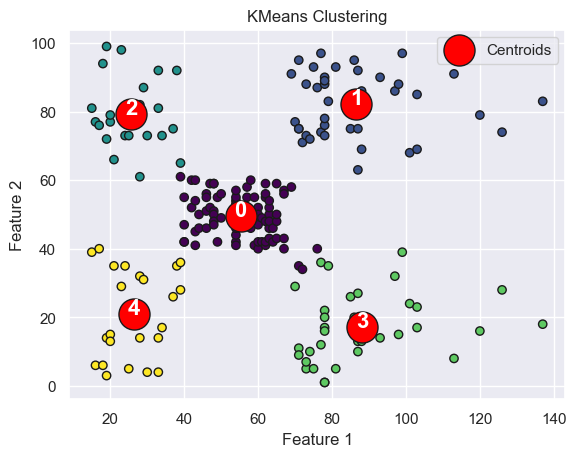

In [ ]:

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

cluster_centers = kmeans_1.cluster_centers_
inertia = kmeans_1.inertia_
silhouette_avg = silhouette_score(X, Y)
ch_score = calinski_harabasz_score(X, Y)
db_score = davies_bouldin_score(X, Y)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {ch_score}")
print(f"Davies-Bouldin Index: {db_score}")

# Visualizing the clusters (if 2D or 3D)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=500, c='red', label='Centroids',edgecolor='k')

# Annotate each data point with its cluster number
#for i, txt in enumerate(Y):
  #  plt.annotate(txt, (X[i, 0], X[i, 1]), fontsize=8, ha='right')

# Annotate cluster centroids with their cluster numbers
for i, center in enumerate(cluster_centers):
    plt.annotate(f'{i}', center, fontsize=16, ha='center', color='white', weight='bold')

plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



new_data = np.array([[20,100]])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
new_data_scaled = scaler.transform(new_data)

predicted_clusters = kmeans_1.predict(new_data_scaled)


print(f"Predicted Clusters for New Data: {predicted_clusters}")


Predicted Clusters for New Data: [2]


In [ ]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
Y_1=pd.DataFrame(Y)
merge_D=pd.concat([customer_data,Y_1],ignore_index=True)

merged_df = pd.merge(merge_D, Y_1, left_index=True, right_index=True, how='inner')
merged_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0_x,0_y
0,1.0,Male,19.0,15.0,39.0,NaN,4
1,2.0,Male,21.0,15.0,81.0,NaN,2
2,3.0,Female,20.0,16.0,6.0,NaN,4
3,4.0,Female,23.0,16.0,77.0,NaN,2
4,5.0,Female,31.0,17.0,40.0,NaN,4
...,...,...,...,...,...,...,...
195,196.0,Female,35.0,120.0,79.0,NaN,1
196,197.0,Female,45.0,126.0,28.0,NaN,3
197,198.0,Male,32.0,126.0,74.0,NaN,1
198,199.0,Male,32.0,137.0,18.0,NaN,3
